In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from kalman_filter_pp.plots import detector_xy_projection, detector_rz_projection, particle_xy_projection_byId,\
    particle_rz_projection_byId, particle_xy_projection_byEvents, particle_rz_projection_byEvents,\
    helix_xy_trajectory, helix_rz_trajectory

from kalman_filter_pp.helix import Helix, helix_seeding

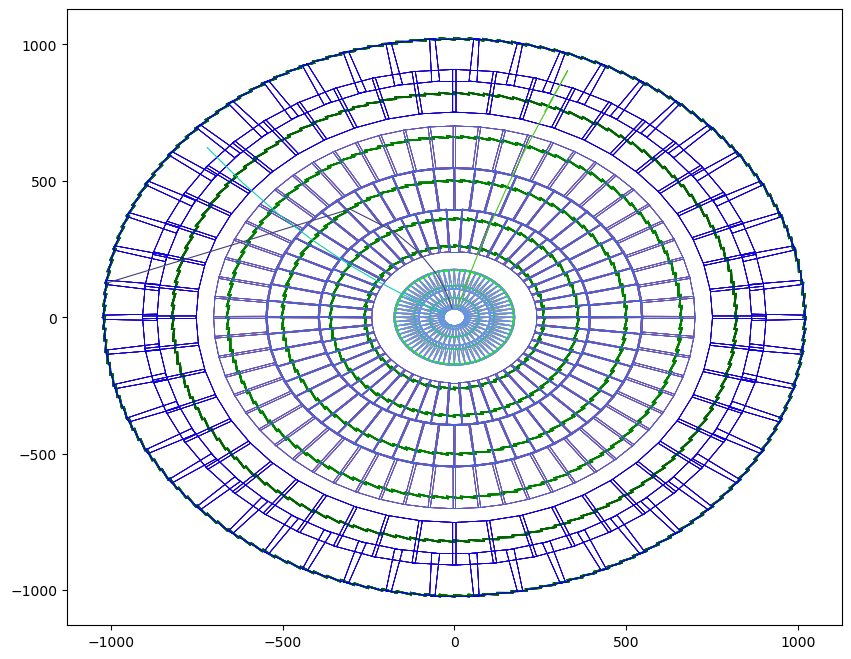

In [2]:
fig, ax = plt.subplots(figsize=(10, 8))
detector_xy_projection(ax)
particle_xy_projection_byId(ax, "event000001000.csv", [4503668346847232, 4503737066323968, 4505317614288896], rand_color=True)
ax.axis("auto")
plt.show()


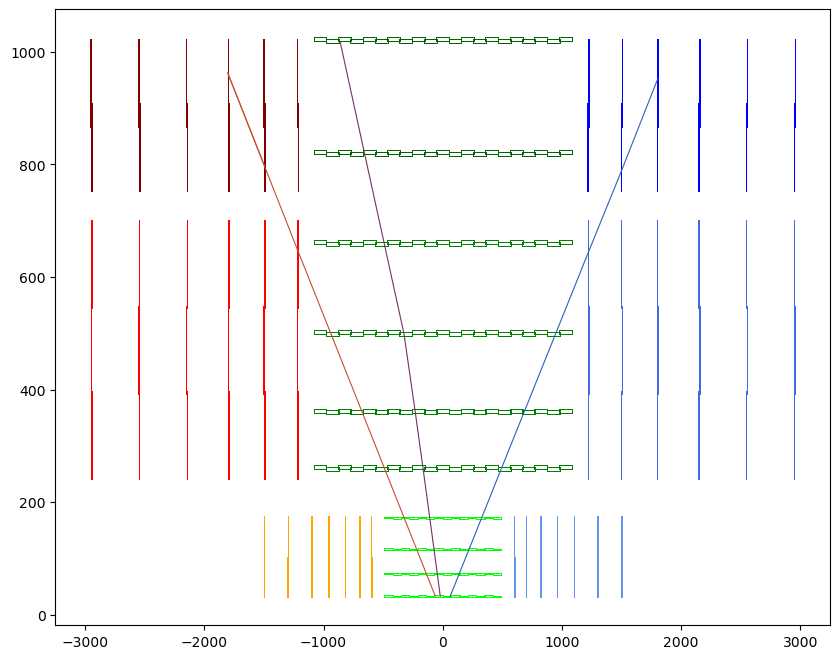

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))
detector_rz_projection(ax)
particle_rz_projection_byId(ax, "event000001000.csv", [4503668346847232, 4503737066323968, 4505317614288896], rand_color=True)
ax.axis("auto")
plt.show()

100%|██████████| 814/814 [00:02<00:00, 383.71it/s]


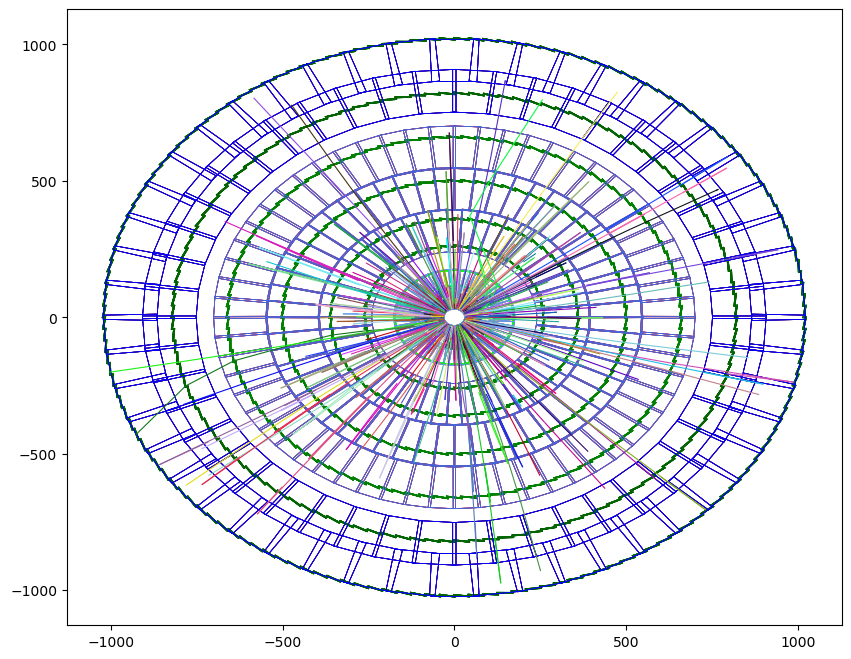

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
detector_xy_projection(ax)
particle_xy_projection_byEvents(ax, "event000001000.csv", momentum_cutoff=10, rand_color=True)
ax.axis("auto")
plt.show()

100%|██████████| 814/814 [00:02<00:00, 323.59it/s]


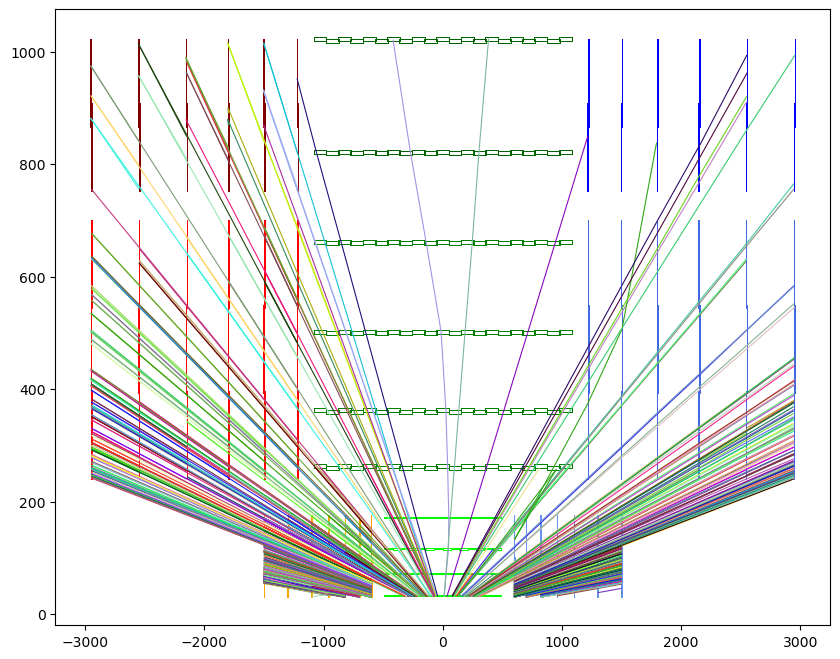

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
detector_rz_projection(ax)
particle_rz_projection_byEvents(ax, "event000001000.csv", momentum_cutoff=10, rand_color=True)
ax.axis("auto")
plt.show()

115568it [00:02, 44740.33it/s]


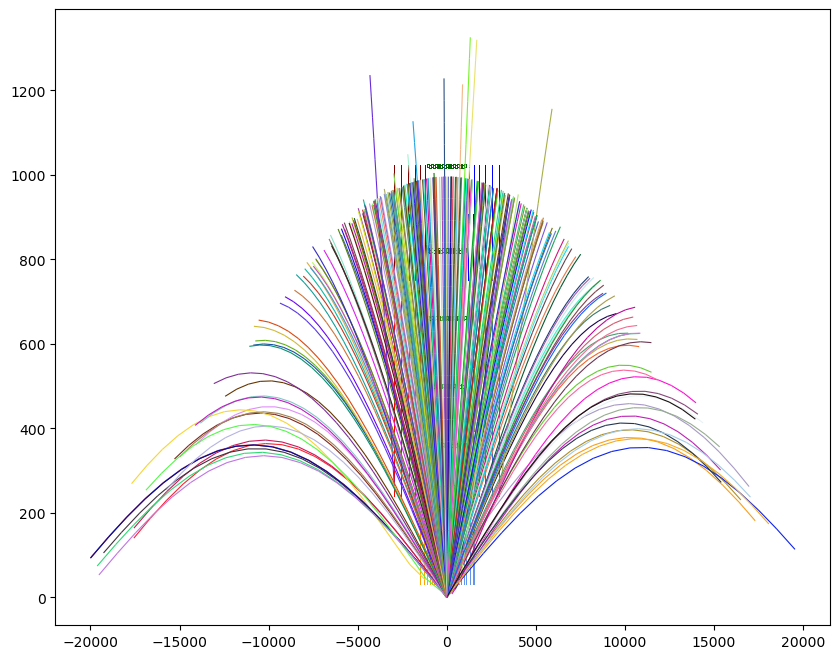

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))

detector_rz_projection(ax)

df = pd.read_csv("../data/processed/event000001000.csv")

for index, row in tqdm(df.iterrows()):
    if row['hit_id'] != -1:
        continue

    momentum = np.array([row['tpx'], row['tpy'], row['tpz']])
    
    if np.linalg.norm(momentum) > 2.1 or np.linalg.norm(momentum) < 1.9:
        continue

    position = np.array([row['x'], row['y'], row['z']])

    magnetic_field = 2
    charge = row['q']

    helix = Helix(helix_seeding, position, momentum, magnetic_field, charge)
    helix_rz_trajectory(ax, helix, rand_color=True)

ax.axis("auto")
plt.show()

115568it [00:02, 41408.39it/s]


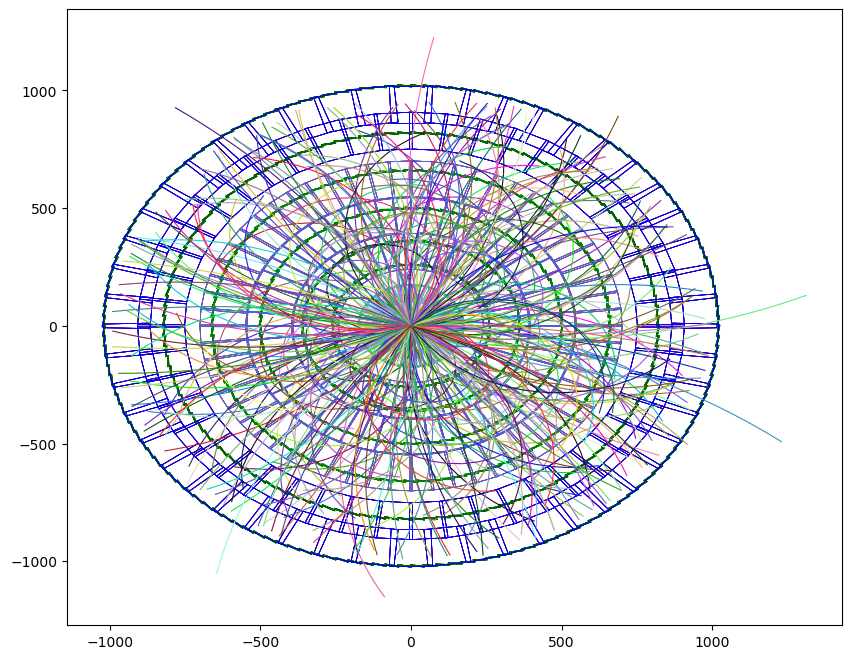

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

detector_xy_projection(ax)

df = pd.read_csv("../data/processed/event000001000.csv")

for index, row in tqdm(df.iterrows()):
    if row['hit_id'] != -1:
        continue

    momentum = np.array([row['tpx'], row['tpy'], row['tpz']])
    
    if np.linalg.norm(momentum) > 2.1 or np.linalg.norm(momentum) < 1.9:
        continue

    position = np.array([row['x'], row['y'], row['z']])

    magnetic_field = 2
    charge = row['q']

    helix = Helix(helix_seeding, position, momentum, magnetic_field, charge)
    helix_xy_trajectory(ax, helix, rand_color=True)

ax.axis("auto")
plt.show()